In [3]:
import pandas as pd
import numpy as np

In [ ]:
# IMDB
df_gen = pd.read_json('/content/sst-2_train.json')
obj = pd.read_json('/content/imdb_dev.jsonl', lines=True)
obj.drop(columns='id')
df_gen = df_gen.replace({'label':{0:'generated_0', 1:'generated_1'}})
obj = obj.replace({'label':{0:'original_0', 1:'original_1'}})
df = pd.concat([df_gen.sample(1000),obj.sample(1000)])
df

In [ ]:
# Hyperpartisan Politics
df_gen_true = pd.read_json('/content/hyperpartisan_news_true_500_sorted.json')
df_gen_false = pd.read_json('/content/hyperpartisan_news_false_500_sorted.json')
obj = pd.read_json('train.jsonl', lines=True)
obj = obj.iloc[:, ::-1].drop(columns='id')
df_gen = pd.concat([df_gen_true, df_gen_false])
df_gen = df_gen.replace({'label':{'true':'generated_true', 'false':'generated_false'}})
obj = obj.replace({'label':{'true':'original_true', 'false':'original_false'}})
df = pd.concat([df_gen,obj])

In [ ]:
# Hyperpartisan News
df_gen_true = pd.read_json('/content/hyperpartisan_news_true_500_sorted (1).json')
df_gen_false = pd.read_json('/content/hyperpartisan_news_false_100_sorted_v1.json')
obj = pd.read_json('train.jsonl', lines=True)
obj = obj.iloc[:, ::-1].drop(columns='id')
df_gen = pd.concat([df_gen_true, df_gen_false])
df_gen = df_gen.replace({'label':{'true':'generated_true', 'false':'generated_false'}})
obj = obj.replace({'label':{'true':'original_true', 'false':'original_false'}})
df = pd.concat([df_gen,obj])
df

In [ ]:
# RCT
df_gen_conclusion = pd.read_json('/content/rct_Conclusions_500.json')
df_gen_method =  pd.read_json('/content/rct_METHODS_100.json')
df_rct = pd.read_json('/content/dev.jsonl', lines=True)
df_rct = df_rct.iloc[:, ::-1].drop(columns='metadata')
df_gen_rct = pd.concat([df_gen_conclusion.sample(100), df_gen_method])
df_gen_rct = df_gen_rct.replace({'label':{'Conclusions':'generated_Conclusions', 'METHODS':'generated_Methods'}})
df_rct = pd.concat([df_rct[df_rct['label'] == 'CONCLUSIONS'].sample(100), df_rct[df_rct['label'] == 'METHODS'].sample(100)])
df = df_rct.replace({'label':{'CONCLUSIONS':'original_Conclusions', 'METHODS':'original_Methods'}})
df_RCT = pd.concat([df_gen_rct, df_rct])
df_RCT

In [ ]:
# Amazon

obj = pd.read_json('/content/amazon_dev.jsonl', lines=True)
obj = obj.drop(columns='id')
df_gen = pd.read_json('/content/amazon_train.json')
df_gen = df_gen.replace({'label':{'Helpful':'generated_helpful', 'Unhelpful':'generated_unhelpful'}})
obj = obj.replace({'label':{'helpful':'original_helpful', 'unhelpful':'original_unhelpful'}})
df = pd.concat([df_gen,obj.sample(600)])
df

In [ ]:
def featurize(data_df, tokenizer, vocab, max_seq_length=128):
    vocab_to_idx = {word: i for i, word in enumerate(vocab)}
    text_data = []
    label_data = []
    for row in tqdm.tqdm_notebook(data_df.itertuples(), total=len(data_df)):
        tokenized = tokenizer.tokenize(row.text.lower())
        if len(tokenized) < max_seq_length:
            # pad each input sequence to the maximum sequence length
            tokenized += [PAD_TOKEN] * (max_seq_length - len(tokenized))
        tokenized = tokenized[:max_seq_length]
        ids = [vocab_to_idx.get(token, 0) for token in tokenized]
        text_data.append(ids)
        label_data.append(row.label)
    return np.array(text_data), np.array(label_data)

tokenizer = sacremoses.MosesTokenizer()
text, labels = featurize(df, tokenizer, vocab)

In [ ]:
text_embed = []

for sentence in text:
    sentence_embed = []
    for word in sentence:
        word_embed = embeddings[word]
        sentence_embed.append(word_embed)
    text_embed.append(sentence_embed)
text_embedding = np.array(text_embed)
average = np.mean(text_embedding, axis=1)
average

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = CountVectorizer()
tfidf = TfidfVectorizer()

X_train_counts = count_vect.fit_transform(x_df.text)
X = tfidf.fit_transform(x_df.text)
y=x_df.set

In [19]:
!pip install yellowbrick

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


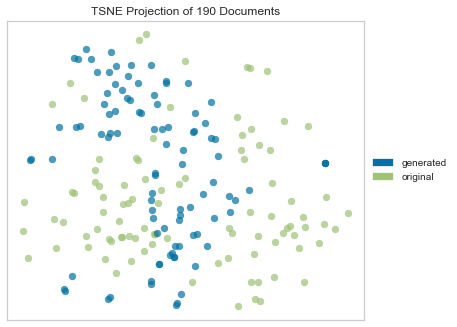

In [22]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(average, labels)
tsne.show()

In [24]:
from nltk.translate.bleu_score import SmoothingFunction, corpus_bleu, sentence_bleu


def bleu(ref, gen):
    ''' 
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences 
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

In [25]:
bleu(Methods_df.text,gen_df.text)

0.0017888189081306362